In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme(rc={'figure.figsize': (11.7, 8.27)})

In [3]:
import warnings
warnings.filterwarnings('ignore')

# EDA

In [4]:
data = pd.read_csv("student-mat.csv")

In [6]:
data.head()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,3,4,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,3,10,7,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,5,2,15,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,5,4,6,10


<Axes: xlabel='G3', ylabel='Count'>

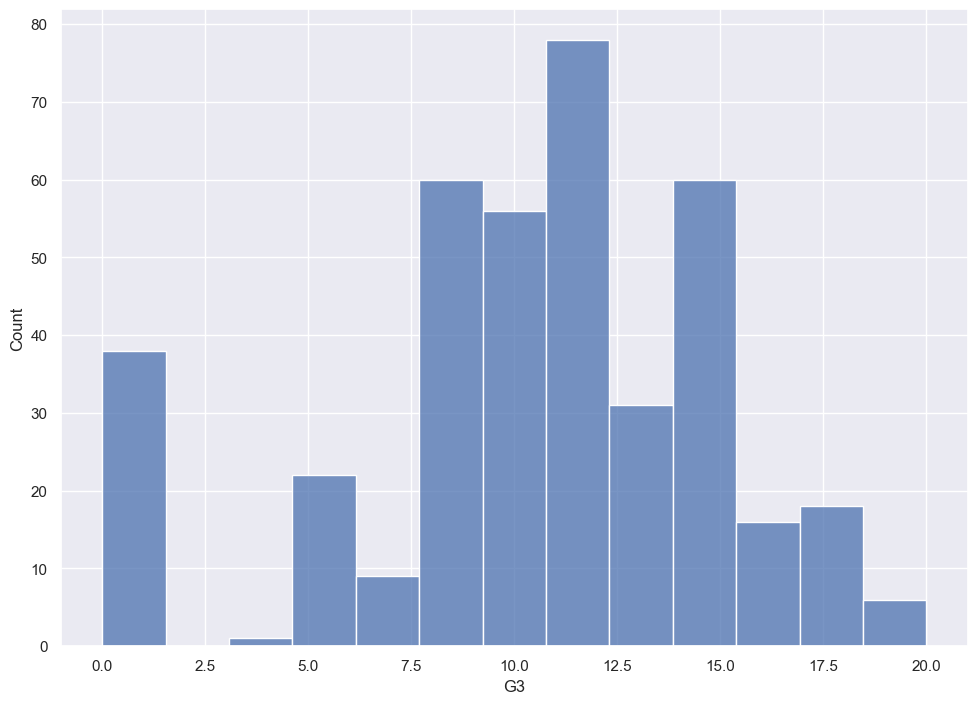

In [7]:
sns.histplot(data['G3'])

Среди студентов есть те, кто получил оценку, равную нулю. Посмотрим их оценки за первый учебный модуль

<Axes: xlabel='G1', ylabel='Count'>

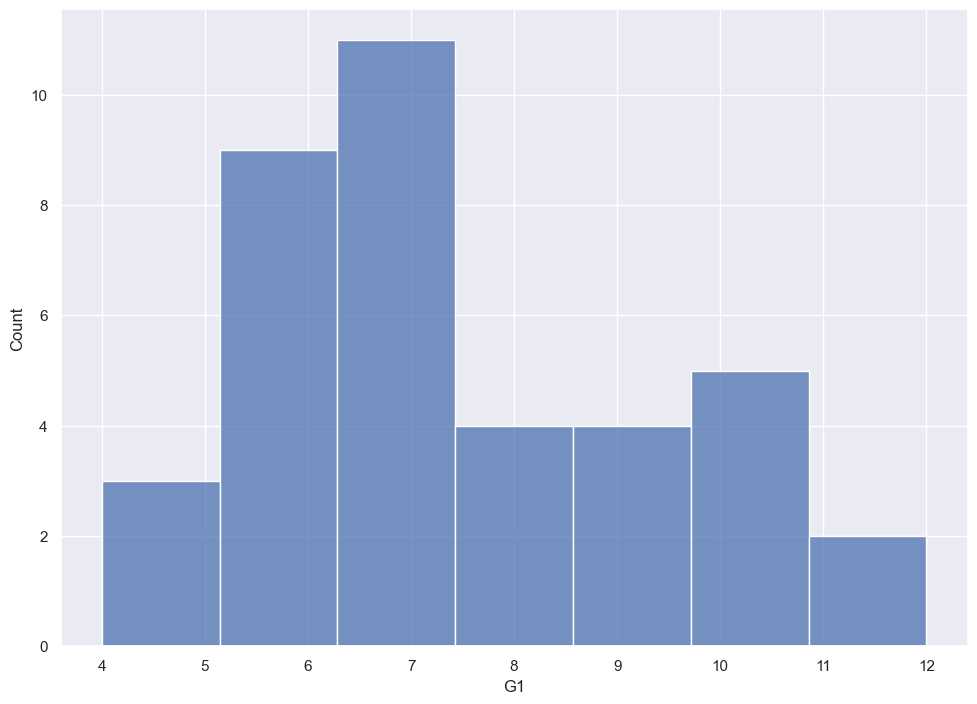

In [9]:
sns.histplot(data[data['G3'] == 0]['G1'])

Из графика видно, что за первый учебный год у них все было хорошо с оценками, следовательно это неординарные случаи, которые имеет смысл исключить для корректной работы модели

In [10]:
data = data[data['G3'] != 0]

<Axes: xlabel='G3', ylabel='Count'>

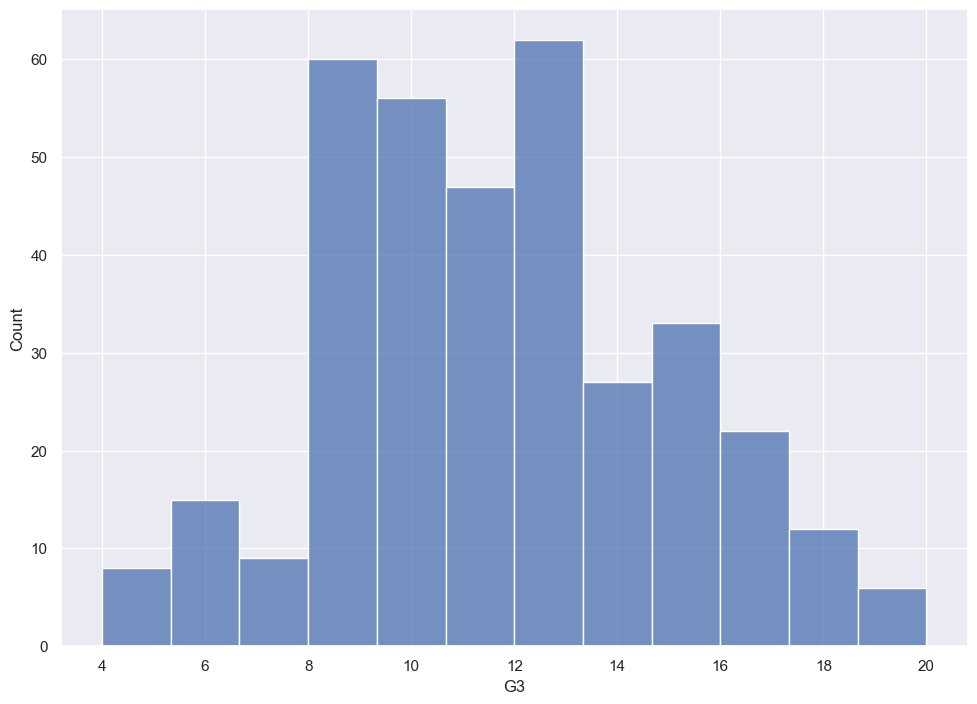

In [11]:
sns.histplot(data['G3'])

In [12]:
data.columns

Index(['school', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'G1', 'G3'],
      dtype='object')

In [15]:
data['school'].value_counts()

school
GP    315
MS     42
Name: count, dtype: int64

In [18]:
for col in data.columns:
    print(data[col].value_counts())
    print("------------\n")

school
GP    315
MS     42
Name: count, dtype: int64
------------

gender
F    185
M    172
Name: count, dtype: int64
------------

age
16    97
17    90
15    76
18    70
19    19
20     3
22     1
21     1
Name: count, dtype: int64
------------

address
U    279
R     78
Name: count, dtype: int64
------------

famsize
GT3    250
LE3    107
Name: count, dtype: int64
------------

Pstatus
T    318
A     39
Name: count, dtype: int64
------------

Medu
4    125
3     90
2     89
1     50
0      3
Name: count, dtype: int64
------------

Fedu
2    102
3     94
4     88
1     71
0      2
Name: count, dtype: int64
------------

Mjob
other       127
services     94
teacher      54
at_home      50
health       32
Name: count, dtype: int64
------------

Fjob
other       196
services    100
teacher      26
health       18
at_home      17
Name: count, dtype: int64
------------

reason
course        126
reputation     99
home           97
other          35
Name: count, dtype: int64
------------

g

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Отделяем фичи от таргета
X = data.drop(columns=['G3'])
y = data['G3']

In [23]:
X.shape

(357, 29)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=50, 
                                                    random_state=0)

In [25]:
X_train.shape, X_test.shape

((307, 29), (50, 29))

In [26]:
X_y_train = X_train.copy(deep=True)
X_y_train['y'] = y_train

In [28]:
X_y_train.head()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,y
295,GP,M,17,U,GT3,T,3,3,health,other,...,yes,yes,no,4,4,3,5,4,14,11
224,GP,F,16,U,GT3,T,4,4,teacher,services,...,yes,yes,no,5,3,2,5,0,13,14
197,GP,M,16,R,LE3,T,3,3,teacher,other,...,yes,yes,no,3,3,4,3,8,9,10
231,GP,M,17,R,GT3,T,2,2,other,other,...,yes,yes,no,4,5,2,1,4,11,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,no,no,4,1,4,1,6,6,6


In [49]:
# строим матрицу корреляции

data_numeric = X_y_train.select_dtypes(include=['number'])
corr_matrix = data_numeric.corr()

In [53]:
# корреляция признаков со значениями таргета

corr = corr_matrix['y']
corr

age          -0.163554
Medu          0.205427
Fedu          0.150231
traveltime   -0.131757
studytime     0.158553
failures     -0.311091
famrel        0.075401
freetime     -0.051553
goout        -0.196119
health       -0.071237
absences     -0.229859
G1            0.896589
y             1.000000
Name: y, dtype: float64

In [54]:
corr = corr[(corr >= 0.1) | (corr <= -0.1)]

In [55]:
corr

age          -0.163554
Medu          0.205427
Fedu          0.150231
traveltime   -0.131757
studytime     0.158553
failures     -0.311091
goout        -0.196119
absences     -0.229859
G1            0.896589
y             1.000000
Name: y, dtype: float64

<Axes: xlabel='G1', ylabel='y'>

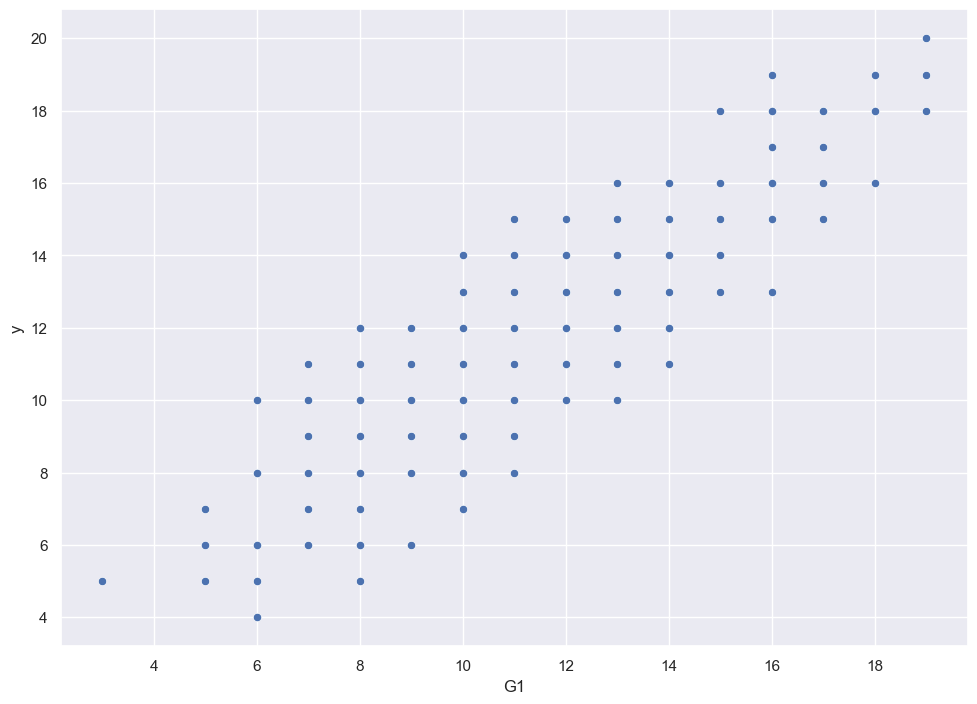

In [56]:
sns.scatterplot(x=X_y_train['G1'], y=X_y_train['y'])

<Axes: xlabel='age', ylabel='y'>

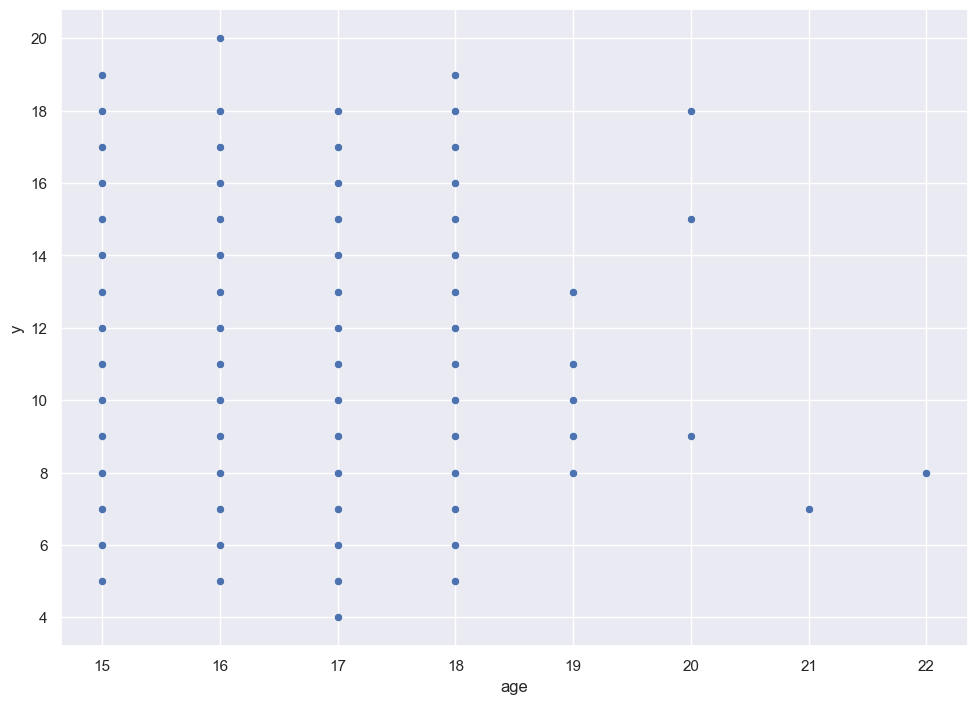

In [57]:
sns.scatterplot(x=X_y_train['age'], y=X_y_train['y'])

<Axes: xlabel='age', ylabel='y'>

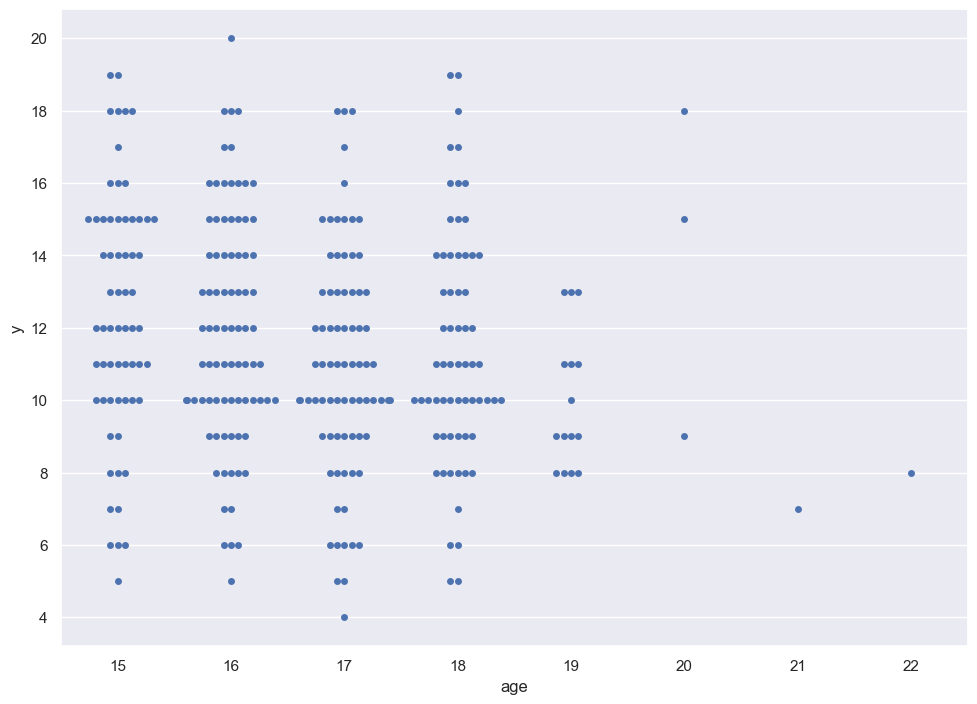

In [58]:
sns.swarmplot(x=X_y_train['age'], y=X_y_train['y'])

In [63]:
numeric_features_to_use = list(corr.index)[:-1]

In [64]:
numeric_features_to_use

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'goout',
 'absences',
 'G1']

In [68]:
data_str = X_y_train.select_dtypes(include=['object'])
data_str['y'] = X_y_train['y']

In [69]:
data_str

,school,gender,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,y
295,GP,M,U,GT3,T,health,other,home,mother,no,yes,yes,no,yes,yes,yes,no,11
224,GP,F,U,GT3,T,teacher,services,home,mother,no,yes,no,yes,no,yes,yes,no,14
197,GP,M,R,LE3,T,teacher,other,home,father,no,yes,yes,yes,yes,yes,yes,no,10
231,GP,M,R,GT3,T,other,other,course,father,no,yes,yes,yes,yes,yes,yes,no,11
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,MS,F,U,LE3,A,services,other,reputation,mother,no,no,no,no,yes,yes,no,yes,11
210,GP,F,U,GT3,T,other,other,reputation,other,no,yes,yes,yes,yes,yes,yes,no,8
117,GP,M,U,GT3,T,other,services,home,father,no,no,no,yes,yes,yes,yes,no,13
47,GP,M,U,GT3,T,health,services,reputation,mother,no,no,no,yes,yes,yes,yes,no,20


Ищем категориальные факторы, которые "разделяют" учеников на тех, кто получил хорошую и плохую оценки

In [72]:
for col in data_str.columns[:-1]:
    print(data_str.groupby(col, as_index=False) \
            .agg({'y': 'mean'}))

  school          y
0     GP  11.715356
1     MS  10.725000
  gender          y
0      F  11.238994
1      M  11.959459
  address          y
0       R  10.771429
1       U  11.827004
  famsize          y
0     GT3  11.479638
1     LE3  11.860465
  Pstatus          y
0       A  11.968750
1       T  11.541818
       Mjob          y
0   at_home  10.622222
1    health  13.583333
2     other  10.962963
3  services  12.253012
4   teacher  11.744681
       Fjob          y
0   at_home  11.714286
1    health  11.866667
2     other  11.339181
3  services  11.476190
4   teacher  13.565217
       reason          y
0      course  11.279279
1        home  11.583333
2       other  11.928571
3  reputation  11.880952
  guardian          y
0   father  11.813333
1   mother  11.602871
2    other  10.695652
  schoolsup          y
0        no  11.835821
1       yes   9.871795
  famsup          y
0     no  11.698276
1    yes  11.518325
  paid          y
0   no  11.581699
1  yes  11.590909
  activities       

In [74]:
# берем те признаки, у которых наибольшие различия в средних значениях y

str_features_to_use = ['schoolsup', 'higher', 'Mjob', 'Fjob']

In [75]:
result_features = numeric_features_to_use + str_features_to_use

In [76]:
result_features

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'goout',
 'absences',
 'G1',
 'schoolsup',
 'higher',
 'Mjob',
 'Fjob']

# Подготовка факторов

In [77]:
from category_encoders import TargetEncoder

In [83]:
# целевое кодирование кат. признаков

mjob_target_encoder = TargetEncoder()
mjob_target_encoder.fit(X_y_train['Mjob'], X_y_train['y'])

fjob_target_encoder = TargetEncoder()
fjob_target_encoder.fit(X_y_train['Fjob'], X_y_train['y'])

schoolsup_target_encoder = TargetEncoder()
schoolsup_target_encoder.fit(X_y_train['schoolsup'], X_y_train['y'])

higher_target_encoder = TargetEncoder()
higher_target_encoder.fit(X_y_train['higher'], X_y_train['y'])

,verbose,0
,cols,['higher']
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,min_samples_leaf,20
,smoothing,10
,hierarchy,None


In [86]:
X_y_train['Mjob_encoded'] = mjob_target_encoder.transform(X_y_train['Mjob'])
X_y_train['Fjob_encoded'] = fjob_target_encoder.transform(X_y_train['Fjob'])
X_y_train['schoolsup_encoded'] = schoolsup_target_encoder.transform(X_y_train['schoolsup'])
X_y_train['higher_encoded'] = higher_target_encoder.transform(X_y_train['higher'])

In [87]:
X_y_train

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,health,absences,G1,y,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,GP,M,17,U,GT3,T,3,3,health,other,...,4,3,5,4,14,11,12.781907,11.339181,11.835821,11.657627
224,GP,F,16,U,GT3,T,4,4,teacher,services,...,3,2,5,0,13,14,11.734708,11.476373,11.835821,11.657627
197,GP,M,16,R,LE3,T,3,3,teacher,other,...,3,4,3,8,9,10,11.734708,11.339181,11.835821,11.657627
231,GP,M,17,R,GT3,T,2,2,other,other,...,5,2,1,4,11,11,10.963057,11.339181,11.835821,11.657627
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,6,6,6,10.963057,12.723082,10.094869,11.657627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,MS,F,17,U,LE3,A,3,2,services,other,...,2,3,5,2,12,11,12.251790,11.339181,11.835821,11.657627
210,GP,F,19,U,GT3,T,3,3,other,other,...,3,3,3,10,8,8,10.963057,11.339181,11.835821,11.657627
117,GP,M,16,U,GT3,T,3,3,other,services,...,4,2,5,0,13,13,10.963057,11.476373,11.835821,11.657627
47,GP,M,16,U,GT3,T,4,3,health,services,...,2,2,2,4,19,20,12.781907,11.476373,11.835821,11.657627


In [88]:
features_to_use = numeric_features_to_use + ['Mjob_encoded', 'Fjob_encoded', 'schoolsup_encoded', 'higher_encoded']

In [89]:
features_to_use

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'goout',
 'absences',
 'G1',
 'Mjob_encoded',
 'Fjob_encoded',
 'schoolsup_encoded',
 'higher_encoded']

In [90]:
X_train_encoded = X_y_train.copy(deep=True)
X_train_encoded = X_train_encoded[features_to_use]

In [91]:
X_train_encoded

,age,Medu,Fedu,traveltime,studytime,failures,goout,absences,G1,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,17,3,3,1,1,0,3,4,14,12.781907,11.339181,11.835821,11.657627
224,16,4,4,1,3,0,2,0,13,11.734708,11.476373,11.835821,11.657627
197,16,3,3,3,1,0,4,8,9,11.734708,11.339181,11.835821,11.657627
231,17,2,2,2,2,0,2,4,11,10.963057,11.339181,11.835821,11.657627
7,17,4,4,2,2,0,4,6,6,10.963057,12.723082,10.094869,11.657627
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,17,3,2,2,2,0,3,2,12,12.251790,11.339181,11.835821,11.657627
210,19,3,3,1,4,0,3,10,8,10.963057,11.339181,11.835821,11.657627
117,16,3,3,2,1,0,2,0,13,10.963057,11.476373,11.835821,11.657627
47,16,4,3,1,4,0,2,4,19,12.781907,11.476373,11.835821,11.657627


## Нормализация итоговых факторов

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler = MinMaxScaler()
scaler.fit(X_train_encoded)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [94]:
X_train_scaled = scaler.transform(X_train_encoded)

In [95]:
X_train_scaled

array([[0.28571429, 0.75      , 0.75      , ..., 0.        , 1.        ,
        1.        ],
       [0.14285714, 1.        , 1.        , ..., 0.09913411, 1.        ,
        1.        ],
       [0.14285714, 0.75      , 0.75      , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.14285714, 0.75      , 0.75      , ..., 0.09913411, 1.        ,
        1.        ],
       [0.14285714, 1.        , 0.75      , ..., 0.09913411, 1.        ,
        1.        ],
       [0.14285714, 0.5       , 0.75      , ..., 0.09913411, 1.        ,
        1.        ]], shape=(307, 13))

# Обучение модели

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
model = LinearRegression()

In [99]:
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Проверяем точность модели на обучающей выборке по метрике R^2

In [101]:
model.score(X_train_scaled, y_train)

0.8296948851119446

Чтобы проверить работу модели на тестовой выборке, необходимо применить к ней такие же преобразования, как и к обучающей (целевое кодирование + нормализация)

<b>Важно</b>: целевое кодирование производится с помощью уже имеющихся кодировщиков

In [102]:
X_test['Mjob_encoded'] = mjob_target_encoder.transform(X_test['Mjob'])
X_test['Fjob_encoded'] = fjob_target_encoder.transform(X_test['Fjob'])
X_test['schoolsup_encoded'] = schoolsup_target_encoder.transform(X_test['schoolsup'])
X_test['higher_encoded'] = higher_target_encoder.transform(X_test['higher'])

In [103]:
X_test_encoded = X_test[features_to_use]

In [105]:
X_test_encoded = scaler.transform(X_test_encoded)

In [108]:
X_test_encoded

array([[0.14285714, 0.5       , 0.5       , 0.        , 0.33333333,
        0.        , 0.75      , 0.        , 0.5625    , 0.12829793,
        0.        , 1.        , 1.        ],
       [0.        , 0.75      , 0.75      , 0.33333333, 0.66666667,
        0.66666667, 0.        , 0.10666667, 0.4375    , 0.74593618,
        0.09913411, 1.        , 1.        ],
       [0.42857143, 0.5       , 0.5       , 0.        , 1.        ,
        0.        , 1.        , 0.02666667, 0.375     , 0.12829793,
        0.        , 1.        , 1.        ],
       [0.28571429, 1.        , 0.75      , 0.33333333, 0.33333333,
        0.        , 1.        , 0.18666667, 0.5625    , 1.        ,
        0.        , 1.        , 1.        ],
       [0.14285714, 0.75      , 0.75      , 0.        , 0.66666667,
        0.        , 0.5       , 0.        , 0.25      , 0.12829793,
        0.        , 1.        , 1.        ],
       [0.14285714, 0.75      , 0.75      , 0.66666667, 0.33333333,
        0.        , 0.5    

In [113]:
def score_model(model: LinearRegression,
                X_test, y_test):
    """Считает метрики MAE и R^2"""

    y_preds = model.predict(X_test)

    errs = [] # ошибки

    for y, y_pred in zip(y_test, y_preds):
        errs.append(abs(y - y_pred))
    
    mae = sum(errs) / len(errs)

    mean_y_test = sum(y_test) / len(y_test)
    r2 = 1 - (sum(err**2 for err in errs) / sum((y - mean_y_test)**2 for y in y_test))

    return mae, r2

In [115]:
mae, r2 = score_model(model, X_test_encoded, y_test)
print(f"Точность модели на тестовой выборке (R^2): {round(r2, 2)}\n",
      f"Точность модели на тестовой выборке (MAE): {round(mae, 2)}\n",
      sep="")

Точность модели на тестовой выборке (R^2): 0.74
Точность модели на тестовой выборке (MAE): 1.25

